In [3]:

!python -m pip install --upgrade pip --quiet

In [4]:

!pip install ipykernel --upgrade --quiet

In [5]:

!pip install networkx --upgrade --quiet


# Link Prediction

In [6]:

import networkx as nx
import matplotlib.pyplot as plt
import collections
%matplotlib inline

In [7]:

# Draw the graph using various layouts
def get_layout_dict(G):
    layout_dict = {}
    for layout_type in [function for function in dir(nx) if '_layout' in function]:
        try:
            layout_dict[layout_type] = getattr(nx, layout_type)(G)
        except Exception as e:
            print(layout_type, e)
    
    return layout_dict

In [8]:

def draw_graph(G, pos_dict, degree_dict):
    plt.figure(figsize=(18, 8))
    label_dict = nx.draw_networkx_labels(G, pos=pos_dict, font_size=24)
    line_collection = nx.draw_networkx_edges(G, pos=pos_dict, width=2.5)

    # Color according to degree
    node_list = G.nodes()
    node_color_list = [degree_dict[node] for node in node_list]
    path_collection = nx.draw_networkx_nodes(G, pos=pos_dict, nodelist=node_list, alpha=0.45,
                                             node_size=2400, node_color=node_color_list, cmap='viridis_r')

In [9]:

def draw_histogram(G, degree_sequence, xlabel='Degree'):
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    sum_cnt = sum(cnt)
    fraction_list = [x/sum_cnt for x in cnt]
    plt.bar(deg, fraction_list, width=0.80, color='b')

    plt.title(xlabel+' Histogram')
    plt.ylabel('Fraction of Nodes')
    plt.xlabel(xlabel)
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    # draw graph in inset
    plt.axes([0.4, 0.4, 0.5, 0.5])
    if nx.is_directed(G):
        Gcc = G
    else:
        Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
    pos = nx.spring_layout(G)
    plt.axis('off')
    nx.draw_networkx_nodes(Gcc, pos, node_size=20)
    line_collection = nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

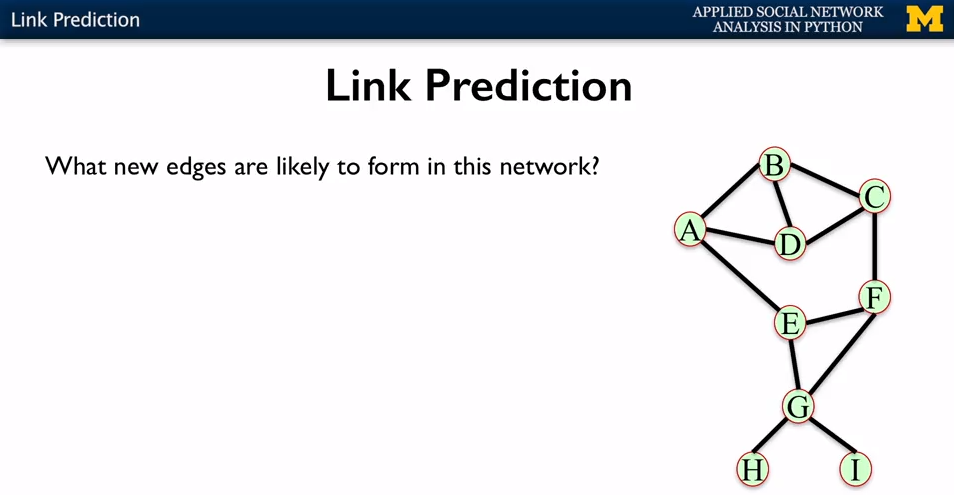

In [10]:

from IPython.display import Image

Image('../../saves/png/link_prediction.png')

In [11]:

link_prediction_graph = nx.Graph()
link_prediction_graph.add_nodes_from([chr(i) for i in range(65, 74)])
link_prediction_graph.add_edges_from([('A', 'B'), ('A', 'D'), ('A', 'E'), ('B', 'C'), ('B', 'D'),
                                          ('C', 'D'), ('C', 'F'), ('E', 'F'), ('E', 'G'), ('F', 'G'),
                                          ('G', 'H'), ('G', 'I')])

In [12]:

LAYOUT_DICT = get_layout_dict(link_prediction_graph)
print(LAYOUT_DICT.keys())

rescale_layout 'Graph' object has no attribute 'shape'
dict_keys(['circular_layout', 'fruchterman_reingold_layout', 'kamada_kawai_layout', 'random_layout', 'shell_layout', 'spectral_layout', 'spring_layout'])


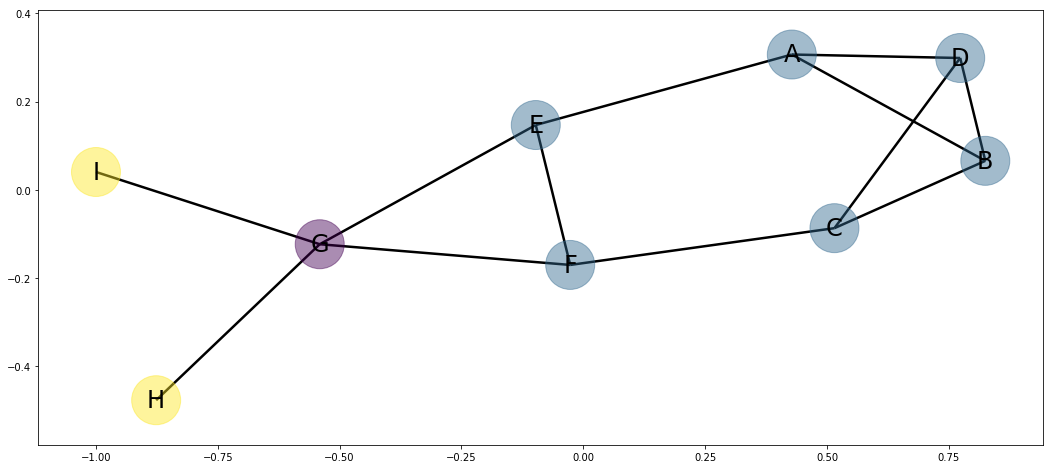

In [13]:

# Draw the graph using various layouts
pos_dict = LAYOUT_DICT['fruchterman_reingold_layout']
degree_dict = link_prediction_graph.degree()
draw_graph(link_prediction_graph, pos_dict, degree_dict)

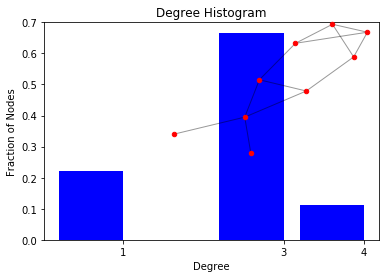

In [14]:

degree_sequence = sorted([d for n, d in link_prediction_graph.degree()], reverse=True)
draw_histogram(link_prediction_graph, degree_sequence)


## Measure 1: Common Neighbors

In [15]:

%pprint

common_neigbors = [(e[0], e[1], len(list(nx.common_neighbors(link_prediction_graph,
                                                             e[0], e[1])))) for e in nx.non_edges(link_prediction_graph)]
sorted(common_neigbors, key=lambda x: x[2], reverse=True)

Pretty printing has been turned OFF


[('C', 'A', 2), ('B', 'E', 1), ('B', 'F', 1), ('D', 'E', 1), ('D', 'F', 1), ('C', 'E', 1), ('C', 'G', 1), ('E', 'H', 1), ('E', 'I', 1), ('A', 'F', 1), ('A', 'G', 1), ('F', 'H', 1), ('F', 'I', 1), ('H', 'I', 1), ('B', 'H', 0), ('B', 'I', 0), ('B', 'G', 0), ('D', 'H', 0), ('D', 'I', 0), ('D', 'G', 0), ('C', 'H', 0), ('C', 'I', 0), ('A', 'H', 0), ('A', 'I', 0)]

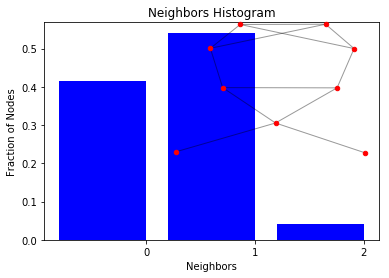

In [16]:

neighbors_sequence = [x[2] for x in sorted(common_neigbors, key=lambda x: x[2], reverse=True)]
draw_histogram(link_prediction_graph, neighbors_sequence, 'Neighbors')


## Measure 2: Jaccard Coefficient


### What is the Jaccard Coefficient between node A and F? Enter your answer as a fraction below the graphic.

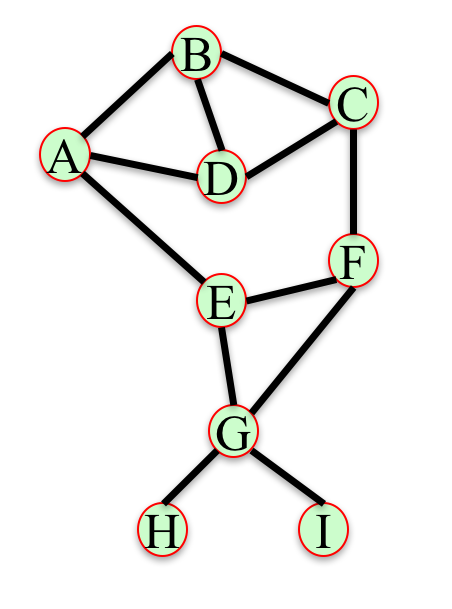

In [17]:

from IPython.display import Image

Image('../../saves/png/prob_8_4.png')

In [18]:

jaccard_coefficient = list(nx.jaccard_coefficient(link_prediction_graph))
sorted(jaccard_coefficient, key=lambda x: x[2], reverse=True)

[('H', 'I', 1.0), ('C', 'A', 0.5), ('E', 'H', 0.3333333333333333), ('E', 'I', 0.3333333333333333), ('F', 'H', 0.3333333333333333), ('F', 'I', 0.3333333333333333), ('B', 'E', 0.2), ('B', 'F', 0.2), ('D', 'E', 0.2), ('D', 'F', 0.2), ('C', 'E', 0.2), ('A', 'F', 0.2), ('C', 'G', 0.16666666666666666), ('A', 'G', 0.16666666666666666), ('B', 'H', 0.0), ('B', 'I', 0.0), ('B', 'G', 0.0), ('D', 'H', 0.0), ('D', 'I', 0.0), ('D', 'G', 0.0), ('C', 'H', 0.0), ('C', 'I', 0.0), ('A', 'H', 0.0), ('A', 'I', 0.0)]


## Measure 3: Resource Allocation


### What is the Resource Allocation index of Node I and H?

In [19]:

sorted(nx.resource_allocation_index(link_prediction_graph), key=lambda x: x[2], reverse=True)

[('C', 'A', 0.6666666666666666), ('B', 'E', 0.3333333333333333), ('B', 'F', 0.3333333333333333), ('D', 'E', 0.3333333333333333), ('D', 'F', 0.3333333333333333), ('C', 'E', 0.3333333333333333), ('C', 'G', 0.3333333333333333), ('A', 'F', 0.3333333333333333), ('A', 'G', 0.3333333333333333), ('E', 'H', 0.25), ('E', 'I', 0.25), ('F', 'H', 0.25), ('F', 'I', 0.25), ('H', 'I', 0.25), ('B', 'H', 0), ('B', 'I', 0), ('B', 'G', 0), ('D', 'H', 0), ('D', 'I', 0), ('D', 'G', 0), ('C', 'H', 0), ('C', 'I', 0), ('A', 'H', 0), ('A', 'I', 0)]


## Measure 4: Adamic-Adar Index

In [20]:

sorted(nx.adamic_adar_index(link_prediction_graph), key=lambda x: x[2], reverse=True)

[('C', 'A', 1.8204784532536746), ('B', 'E', 0.9102392266268373), ('B', 'F', 0.9102392266268373), ('D', 'E', 0.9102392266268373), ('D', 'F', 0.9102392266268373), ('C', 'E', 0.9102392266268373), ('C', 'G', 0.9102392266268373), ('A', 'F', 0.9102392266268373), ('A', 'G', 0.9102392266268373), ('E', 'H', 0.7213475204444817), ('E', 'I', 0.7213475204444817), ('F', 'H', 0.7213475204444817), ('F', 'I', 0.7213475204444817), ('H', 'I', 0.7213475204444817), ('B', 'H', 0), ('B', 'I', 0), ('B', 'G', 0), ('D', 'H', 0), ('D', 'I', 0), ('D', 'G', 0), ('C', 'H', 0), ('C', 'I', 0), ('A', 'H', 0), ('A', 'I', 0)]


## Measure 5: Preferential Attachment

In [21]:

sorted(nx.preferential_attachment(link_prediction_graph), key=lambda x: x[2], reverse=True)

[('B', 'G', 12), ('D', 'G', 12), ('C', 'G', 12), ('A', 'G', 12), ('B', 'E', 9), ('B', 'F', 9), ('D', 'E', 9), ('D', 'F', 9), ('C', 'E', 9), ('C', 'A', 9), ('A', 'F', 9), ('B', 'H', 3), ('B', 'I', 3), ('D', 'H', 3), ('D', 'I', 3), ('C', 'H', 3), ('C', 'I', 3), ('E', 'H', 3), ('E', 'I', 3), ('A', 'H', 3), ('A', 'I', 3), ('F', 'H', 3), ('F', 'I', 3), ('H', 'I', 1)]


# Community Structure


## Measure 6: Common Community Neighbors


### What is the Common Neighbor Soundarajan-Hopcroft score of node I and H?

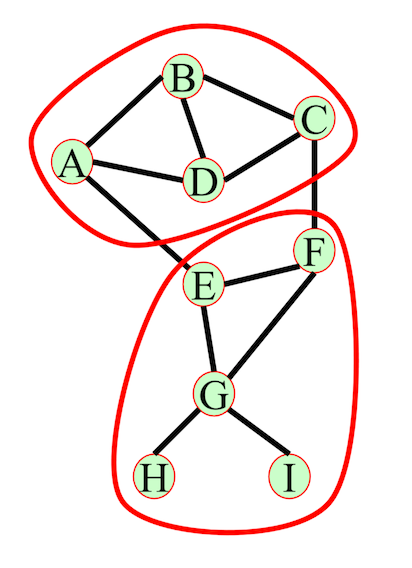

In [22]:

from IPython.display import Image

Image('../../saves/png/prob_8_5.png')

In [23]:

nx.set_node_attributes(link_prediction_graph, name='community',
                       values={'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 2, 'F': 2, 'G': 2, 'H': 2, 'I': 2})
sorted(nx.cn_soundarajan_hopcroft(link_prediction_graph), key=lambda x: x[2], reverse=True)

[('C', 'A', 4), ('E', 'H', 2), ('E', 'I', 2), ('F', 'H', 2), ('F', 'I', 2), ('H', 'I', 2), ('B', 'E', 1), ('B', 'F', 1), ('D', 'E', 1), ('D', 'F', 1), ('C', 'E', 1), ('C', 'G', 1), ('A', 'F', 1), ('A', 'G', 1), ('B', 'H', 0), ('B', 'I', 0), ('B', 'G', 0), ('D', 'H', 0), ('D', 'I', 0), ('D', 'G', 0), ('C', 'H', 0), ('C', 'I', 0), ('A', 'H', 0), ('A', 'I', 0)]


## Measure 7: Community Resource Allocation

In [24]:

nx.set_node_attributes(link_prediction_graph, name='community',
                       values={'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 2, 'F': 2, 'G': 2, 'H': 2, 'I': 2})
sorted(nx.ra_index_soundarajan_hopcroft(link_prediction_graph), key=lambda x: x[2], reverse=True)

[('C', 'A', 0.6666666666666666), ('E', 'H', 0.25), ('E', 'I', 0.25), ('F', 'H', 0.25), ('F', 'I', 0.25), ('H', 'I', 0.25), ('B', 'E', 0), ('B', 'F', 0), ('B', 'H', 0), ('B', 'I', 0), ('B', 'G', 0), ('D', 'E', 0), ('D', 'F', 0), ('D', 'H', 0), ('D', 'I', 0), ('D', 'G', 0), ('C', 'E', 0), ('C', 'H', 0), ('C', 'I', 0), ('C', 'G', 0), ('A', 'H', 0), ('A', 'I', 0), ('A', 'F', 0), ('A', 'G', 0)]

In [25]:

dir(link_prediction_graph)

['__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_adj', '_node', 'add_cycle', 'add_edge', 'add_edges_from', 'add_node', 'add_nodes_from', 'add_path', 'add_star', 'add_weighted_edges_from', 'adj', 'adjacency', 'adjlist_inner_dict_factory', 'adjlist_outer_dict_factory', 'clear', 'copy', 'degree', 'edge_attr_dict_factory', 'edge_subgraph', 'edges', 'fresh_copy', 'get_edge_data', 'graph', 'has_edge', 'has_node', 'is_directed', 'is_multigraph', 'name', 'nbunch_iter', 'neighbors', 'node', 'node_dict_factory', 'nodes', 'nodes_with_selfloops', 'number_of_edges', 'number_of_nodes', 'number_of_selfloops', 'order', 'remove_edge', 'remov

In [26]:

link_prediction_graph._adj

{'A': {'B': {}, 'D': {}, 'E': {}}, 'B': {'A': {}, 'C': {}, 'D': {}}, 'C': {'B': {}, 'D': {}, 'F': {}}, 'D': {'A': {}, 'B': {}, 'C': {}}, 'E': {'A': {}, 'F': {}, 'G': {}}, 'F': {'C': {}, 'E': {}, 'G': {}}, 'G': {'E': {}, 'F': {}, 'H': {}, 'I': {}}, 'H': {'G': {}}, 'I': {'G': {}}}

In [27]:

link_prediction_graph.root_graph

In [28]:

link_prediction_graph._node

{'A': {'community': 1}, 'B': {'community': 1}, 'C': {'community': 1}, 'D': {'community': 1}, 'E': {'community': 2}, 'F': {'community': 2}, 'G': {'community': 2}, 'H': {'community': 2}, 'I': {'community': 2}}